In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np
%matplotlib inline

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import Net Immigration Migration (NIM) data
nim_df = pd.read_csv("Resources/Census-NIM-2017-2060_np2017_d4.csv")

# display data
nim_df

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
0,0,0,2017,996800,20568,16084,14182,12235,10893,10365,...,551,441,342,147,-48,-277,-599,-854,-1159,-11590
1,0,0,2018,1001528,20761,17423,13981,12133,10925,10415,...,564,380,225,68,-140,-328,-672,-983,-1209,-11898
2,0,0,2019,1005801,20951,17579,15132,11969,10832,10436,...,244,348,143,-23,-190,-432,-757,-1031,-1367,-12238
3,0,0,2020,1009861,21140,17735,15248,12950,10689,10354,...,311,44,119,-125,-286,-477,-862,-1152,-1414,-12718
4,0,0,2021,1013839,21322,17882,15364,13041,11499,10244,...,94,98,-176,-149,-399,-604,-911,-1264,-1546,-13167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,9,2,2056,110859,2189,1969,1828,1632,1363,1201,...,-160,-131,-111,-96,-114,-167,-241,-332,-428,-4881
1316,9,2,2057,111134,2199,1979,1838,1640,1370,1208,...,-162,-146,-119,-103,-124,-165,-254,-333,-415,-4913
1317,9,2,2058,111405,2207,1987,1845,1647,1377,1213,...,-166,-146,-131,-109,-129,-175,-251,-350,-416,-4923
1318,9,2,2059,111663,2217,1997,1854,1655,1382,1218,...,-169,-151,-131,-122,-137,-182,-264,-347,-434,-4936


In [3]:
# filter data to show total NIM data for both males and females together. In census NIM dataset, 
# sex == 0 is for both sexes. sex == 1 is for males and sex == 2 is for females. race == 0 is for all races.
nim_df_mf = nim_df.loc[(nim_df['RACE_HISP'] == 0) & (nim_df['SEX'] == 0),:]
nim_df_mf.head()

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
0,0,0,2017,996800,20568,16084,14182,12235,10893,10365,...,551,441,342,147,-48,-277,-599,-854,-1159,-11590
1,0,0,2018,1001528,20761,17423,13981,12133,10925,10415,...,564,380,225,68,-140,-328,-672,-983,-1209,-11898
2,0,0,2019,1005801,20951,17579,15132,11969,10832,10436,...,244,348,143,-23,-190,-432,-757,-1031,-1367,-12238
3,0,0,2020,1009861,21140,17735,15248,12950,10689,10354,...,311,44,119,-125,-286,-477,-862,-1152,-1414,-12718
4,0,0,2021,1013839,21322,17882,15364,13041,11499,10244,...,94,98,-176,-149,-399,-604,-911,-1264,-1546,-13167


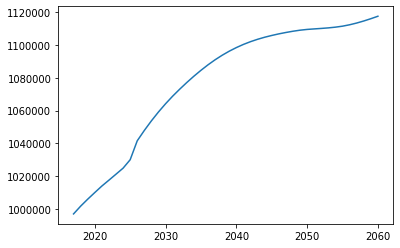

In [4]:
# assign x and y values to prepare to plot graph
year = nim_df_mf['YEAR']
nim = nim_df_mf['TOTAL_NIM']

# plot data using line graph
ax, fig = plt.subplots()
plt.plot(year, nim)
#tick_locations = np.arange(len(year))
#plt.xticks(tick_locations, nim_short_df['YEAR'], rotation=90)


The r-squared is: 0.936023542745225


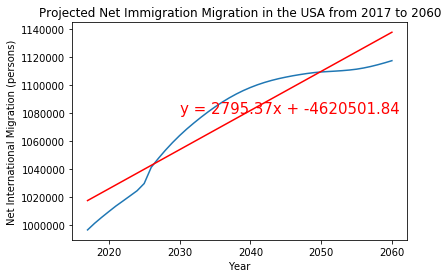

In [5]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, nim)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(year, nim)
plt.plot(year,regress_values,"r-")
plt.annotate(line_eq,(2030,1080000),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Net International Migration (persons)')
plt.title('Projected Net Immigration Migration in the USA from 2017 to 2060')
print(f"The r-squared is: {rvalue}")

# show plot
plt.show()

# Data munging - split data into three main age groups

In [6]:
# create new df that groups together ages by three main age groups: 
# i) under 15 years, 2) 15-44 years, 3) over 44 years by merging columns 

# create new df by age groups and filter to show all races.
nim_df_agegroups = nim_df
nim_df_agegroups = nim_df_agegroups.loc[(nim_df['RACE_HISP']==0),:]


# store columns under new lists by the three age groups
age_under_15 = ['NIM_0', 'NIM_1', 'NIM_2',
       'NIM_3', 'NIM_4', 'NIM_5', 'NIM_6', 'NIM_7', 'NIM_8', 'NIM_9', 'NIM_10',
       'NIM_11', 'NIM_12', 'NIM_13', 'NIM_14']
age_15_44 = ['NIM_15', 'NIM_16', 'NIM_17',
       'NIM_18', 'NIM_19', 'NIM_20', 'NIM_21', 'NIM_22', 'NIM_23', 'NIM_24',
       'NIM_25', 'NIM_26', 'NIM_27', 'NIM_28', 'NIM_29', 'NIM_30', 'NIM_31',
       'NIM_32', 'NIM_33', 'NIM_34', 'NIM_35', 'NIM_36', 'NIM_37', 'NIM_38',
       'NIM_39', 'NIM_40', 'NIM_41', 'NIM_42', 'NIM_43', 'NIM_44']
age_over_44 = ['NIM_45',
       'NIM_46', 'NIM_47', 'NIM_48', 'NIM_49', 'NIM_50', 'NIM_51', 'NIM_52',
       'NIM_53', 'NIM_54', 'NIM_55', 'NIM_56', 'NIM_57', 'NIM_58', 'NIM_59',
       'NIM_60', 'NIM_61', 'NIM_62', 'NIM_63', 'NIM_64', 'NIM_65', 'NIM_66',
       'NIM_67', 'NIM_68', 'NIM_69', 'NIM_70', 'NIM_71', 'NIM_72', 'NIM_73',
       'NIM_74', 'NIM_75', 'NIM_76', 'NIM_77', 'NIM_78', 'NIM_79', 'NIM_80',
       'NIM_81', 'NIM_82', 'NIM_83', 'NIM_84', 'NIM_85']

# sum the age groups and store in new dataframe
nim_df_agegroups['Under 15 years'] = nim_df_agegroups[age_under_15].sum(axis=1)
nim_df_agegroups['15 to 44 years'] = nim_df_agegroups[age_15_44].sum(axis=1)
nim_df_agegroups['Over 44 years'] = nim_df_agegroups[age_over_44].sum(axis=1)
nim_df_agegroups

# remove extraneous columns
nim_df_agegroups = nim_df_agegroups[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM','Under 15 years',
       '15 to 44 years', 'Over 44 years']]
nim_df_agegroups

,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years
0,0,0,2017,996800,188862,720794,87144
1,0,0,2018,1001528,191067,727784,82677
2,0,0,2019,1005801,193119,734795,77887
3,0,0,2020,1009861,194887,742013,72961
4,0,0,2021,1013839,196414,749277,68148
...,...,...,...,...,...,...,...
127,0,2,2056,594882,115836,471221,7825
128,0,2,2057,596196,116219,472918,7059
129,0,2,2058,597595,116609,474632,6354
130,0,2,2059,599062,117001,476372,5689


In [7]:
# calculate percentage by age group
nim_df_agegroups['Perc. under 15 years'] = round((nim_df_agegroups['Under 15 years']/nim_df_agegroups['TOTAL_NIM'])*100,2)
nim_df_agegroups['Perc. 15 to 44 years'] = round((nim_df_agegroups['15 to 44 years']/nim_df_agegroups['TOTAL_NIM'])*100,2)
nim_df_agegroups['Perc. over 44 years'] = round((nim_df_agegroups['Over 44 years']/nim_df_agegroups['TOTAL_NIM'])*100,2)
nim_df_agegroups

,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years
0,0,0,2017,996800,188862,720794,87144,18.95,72.31,8.74
1,0,0,2018,1001528,191067,727784,82677,19.08,72.67,8.26
2,0,0,2019,1005801,193119,734795,77887,19.20,73.06,7.74
3,0,0,2020,1009861,194887,742013,72961,19.30,73.48,7.22
4,0,0,2021,1013839,196414,749277,68148,19.37,73.90,6.72
...,...,...,...,...,...,...,...,...,...,...
127,0,2,2056,594882,115836,471221,7825,19.47,79.21,1.32
128,0,2,2057,596196,116219,472918,7059,19.49,79.32,1.18
129,0,2,2058,597595,116609,474632,6354,19.51,79.42,1.06
130,0,2,2059,599062,117001,476372,5689,19.53,79.52,0.95


(0, 1217651)

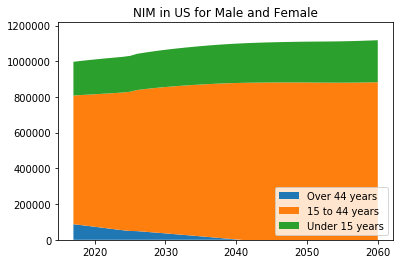

In [8]:
# filter for all sexes 
nim_df_agegroups_mf = nim_df_agegroups.loc[(nim_df_agegroups['SEX']==0),:]

# plot NIM for all sexes using stackplot
x = range(2017,2061) # CHANGE THIS
y = [nim_df_agegroups_mf['Over 44 years'],nim_df_agegroups_mf['15 to 44 years'],nim_df_agegroups_mf['Under 15 years']]
plt.stackplot(x,y, labels = ['Over 44 years','15 to 44 years','Under 15 years'])
plt.legend(loc='lower right')
plt.title('NIM in US for Male and Female')
plt.ylim(0, nim_df_agegroups_mf["TOTAL_NIM"].max()+100000)


In [9]:
# create new df for NIM females only by age group where sex ==2 is females only
nim_df_agegroups_females = nim_df_agegroups.loc[(nim_df_agegroups['SEX']==2),:]
nim_df_agegroups_females

,RACE_HISP,SEX,YEAR,TOTAL_NIM,Under 15 years,15 to 44 years,Over 44 years,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years
88,0,2,2017,507257,91595,357867,57795,18.06,70.55,11.39
89,0,2,2018,509748,92861,361362,55525,18.22,70.89,10.89
90,0,2,2019,512091,93990,364906,53195,18.35,71.26,10.39
91,0,2,2020,514370,94924,368588,50858,18.45,71.66,9.89
92,0,2,2021,516653,95750,372274,48629,18.53,72.05,9.41
93,0,2,2022,518812,96497,376009,46306,18.60,72.48,8.93
94,0,2,2023,520867,97174,379639,44054,18.66,72.89,8.46
95,0,2,2024,522957,97716,383294,41947,18.69,73.29,8.02
96,0,2,2025,525921,98309,387331,40281,18.69,73.65,7.66
97,0,2,2026,532141,99376,392475,40290,18.67,73.75,7.57


(0, 1217651)

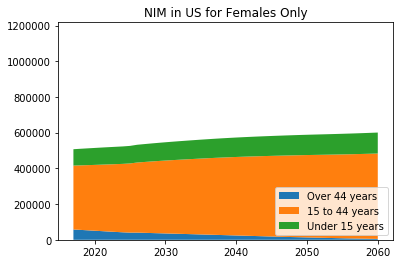

In [10]:
# plot NIM for females only using stackplot
x = range(2017,2061) # CHANGE THIS
y = [nim_df_agegroups_females['Over 44 years'],nim_df_agegroups_females['15 to 44 years'],nim_df_agegroups_females['Under 15 years']]
plt.stackplot(x,y, labels = ['Over 44 years','15 to 44 years','Under 15 years'])
plt.legend(loc='lower right')
plt.title('NIM in US for Females Only')
plt.ylim(0, nim_df_agegroups_mf["TOTAL_NIM"].max()+100000)


# Calculate Low NIM using actual 2019 NIM of 595,348

In [11]:
# first, create new df for low NIM and filter to show all races 
low_nim_df = nim_df.loc[(nim_df['RACE_HISP'] == 0),:]
low_nim_df

# second, create new column with low NIM projected rates by freezing real-time 
# 2019 NIM rates of 595,348 for all years from 2019 to 2060. NIM rates for 
# before 2019 to be the same as historical rates. 
low_nim_df['NIM_LOW'] = np.where(low_nim_df['YEAR']>2018, 595348, low_nim_df['TOTAL_NIM'])
low_nim_df.head()

# remove unnecessary columns
low_nim_df = low_nim_df[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM','NIM_LOW']]
low_nim_df

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW
0,0,0,2017,996800,996800
1,0,0,2018,1001528,1001528
2,0,0,2019,1005801,595348
3,0,0,2020,1009861,595348
4,0,0,2021,1013839,595348
...,...,...,...,...,...
127,0,2,2056,594882,595348
128,0,2,2057,596196,595348
129,0,2,2058,597595,595348
130,0,2,2059,599062,595348


Text(0, 0.5, 'Net International Migration (persons)')

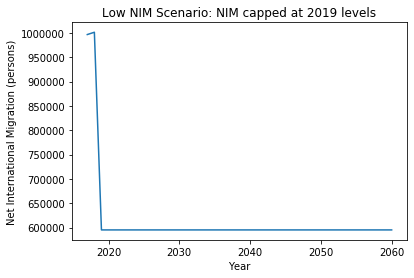

In [12]:
# filter for all sexes and plot low NIM for all sexes
low_nim_df_mf = low_nim_df.loc[(low_nim_df['SEX'] == 0),:]
low_nim_df_mf

# define x (year) and y (NIM)
year = low_nim_df_mf['YEAR']
nim_low = low_nim_df_mf['NIM_LOW']

# plot with low NIM
plt.plot(year,nim_low)
plt.title('Low NIM Scenario: NIM capped at 2019 levels')
plt.xlabel('Year')
plt.ylabel('Net International Migration (persons)')


In [19]:
# calculate numbers of low NIM by age group based on percentages calculated 
# from US Census projections (see nim_df_agegroups dataframe)

# first, merge the datafarmes nim_df_agegroups and low_nim_df 
merge_low_nim_df = pd.merge(low_nim_df, nim_df_agegroups, on=['RACE_HISP','SEX','YEAR'], how='inner')
merge_low_nim_df



,RACE_HISP,SEX,YEAR,TOTAL_NIM_x,NIM_LOW,TOTAL_NIM_y,Under 15 years,15 to 44 years,Over 44 years,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years
0,0,0,2017,996800,996800,996800,188862,720794,87144,18.95,72.31,8.74
1,0,0,2018,1001528,1001528,1001528,191067,727784,82677,19.08,72.67,8.26
2,0,0,2019,1005801,595348,1005801,193119,734795,77887,19.20,73.06,7.74
3,0,0,2020,1009861,595348,1009861,194887,742013,72961,19.30,73.48,7.22
4,0,0,2021,1013839,595348,1013839,196414,749277,68148,19.37,73.90,6.72
...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,2,2056,594882,595348,594882,115836,471221,7825,19.47,79.21,1.32
128,0,2,2057,596196,595348,596196,116219,472918,7059,19.49,79.32,1.18
129,0,2,2058,597595,595348,597595,116609,474632,6354,19.51,79.42,1.06
130,0,2,2059,599062,595348,599062,117001,476372,5689,19.53,79.52,0.95


In [20]:
# remove unnecessary columns
merge_low_nim_df = merge_low_nim_df[['RACE_HISP', 'SEX', 'YEAR', 'TOTAL_NIM_x', 'NIM_LOW', 'Perc. under 15 years', 'Perc. 15 to 44 years','Perc. over 44 years']]
merge_low_nim_df = merge_low_nim_df.rename(columns={'TOTAL_NIM_x':'TOTAL_NIM'})
merge_low_nim_df

# then, calculate figures for low NIM by age group
merge_low_nim_df['Under 15 years'] = round((merge_low_nim_df['NIM_LOW']*merge_low_nim_df['Perc. under 15 years'])/100,0)
merge_low_nim_df['15 to 44 years'] = round((merge_low_nim_df['NIM_LOW']*merge_low_nim_df['Perc. 15 to 44 years'])/100,0)
merge_low_nim_df['Over 44 years'] = round((merge_low_nim_df['NIM_LOW']*merge_low_nim_df['Perc. over 44 years'])/100,0)


merge_low_nim_df

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years,Under 15 years,15 to 44 years,Over 44 years
0,0,0,2017,996800,996800,18.95,72.31,8.74,188894.0,720786.0,87120.0
1,0,0,2018,1001528,1001528,19.08,72.67,8.26,191092.0,727810.0,82726.0
2,0,0,2019,1005801,595348,19.20,73.06,7.74,114307.0,434961.0,46080.0
3,0,0,2020,1009861,595348,19.30,73.48,7.22,114902.0,437462.0,42984.0
4,0,0,2021,1013839,595348,19.37,73.90,6.72,115319.0,439962.0,40007.0
...,...,...,...,...,...,...,...,...,...,...,...
127,0,2,2056,594882,595348,19.47,79.21,1.32,115914.0,471575.0,7859.0
128,0,2,2057,596196,595348,19.49,79.32,1.18,116033.0,472230.0,7025.0
129,0,2,2058,597595,595348,19.51,79.42,1.06,116152.0,472825.0,6311.0
130,0,2,2059,599062,595348,19.53,79.52,0.95,116271.0,473421.0,5656.0


In [21]:
# filter for for females only 
merge_low_nim_females = merge_low_nim_df.loc[(merge_low_nim_df['SEX'] == 2),:]
merge_low_nim_females

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW,Perc. under 15 years,Perc. 15 to 44 years,Perc. over 44 years,Under 15 years,15 to 44 years,Over 44 years
88,0,2,2017,507257,507257,18.06,70.55,11.39,91611.0,357870.0,57777.0
89,0,2,2018,509748,509748,18.22,70.89,10.89,92876.0,361360.0,55512.0
90,0,2,2019,512091,595348,18.35,71.26,10.39,109246.0,424245.0,61857.0
91,0,2,2020,514370,595348,18.45,71.66,9.89,109842.0,426626.0,58880.0
92,0,2,2021,516653,595348,18.53,72.05,9.41,110318.0,428948.0,56022.0
93,0,2,2022,518812,595348,18.60,72.48,8.93,110735.0,431508.0,53165.0
94,0,2,2023,520867,595348,18.66,72.89,8.46,111092.0,433949.0,50366.0
95,0,2,2024,522957,595348,18.69,73.29,8.02,111271.0,436331.0,47747.0
96,0,2,2025,525921,595348,18.69,73.65,7.66,111271.0,438474.0,45604.0
97,0,2,2026,532141,595348,18.67,73.75,7.57,111151.0,439069.0,45068.0
